# <h1 style='text-align:center'> *EDA on Titanic* </h1>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
# Reading Dataset

data=pd.read_csv(r'C:\Users\dines\Desktop\Notes\aiml-datascience-notes-python\data\Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Information Description of Data

print(f'Information of Dataset:')
data.info()

Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  896 non-null    int64  
 1   Survived     896 non-null    int64  
 2   Pclass       896 non-null    int64  
 3   Name         896 non-null    object 
 4   Sex          896 non-null    object 
 5   Age          720 non-null    float64
 6   SibSp        896 non-null    int64  
 7   Parch        896 non-null    int64  
 8   Ticket       896 non-null    object 
 9   Fare         895 non-null    float64
 10  Cabin        205 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.1+ KB


In [4]:
print(f'Description of Dataset:')
data.describe()

Description of Dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,896.000000,896.000000,896.000000,720.000000,896.000000,896.000000,895.000000
mean,444.504464,0.382812,2.311384,29.621069,0.523438,369.754464,32.117630
std,257.639287,0.486345,0.835072,14.516687,1.100283,11056.551471,49.602919
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,20.375000,0.000000,0.000000,7.895800
50%,443.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,330959.000000,512.329200


## Data Cleaning with EDA

#### 1. Missing values

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          691
Embarked         3
dtype: int64

> Dataset `AGE` column has 177 Null values and `cabin` column has 687 null values

 **1.1 Visualization**

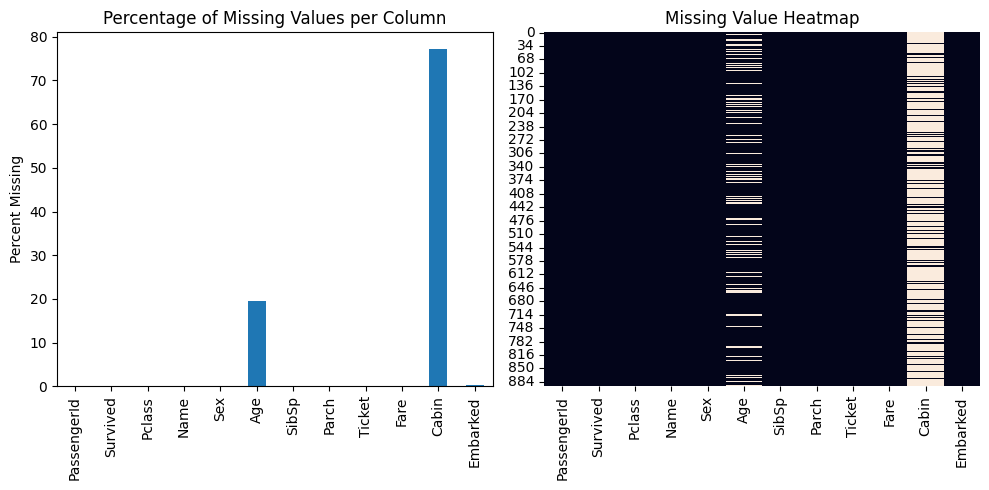

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1️⃣ Bar plot: % of nulls per column
(data.isnull().mean() * 100).plot(
    kind="bar",
    ax=axes[0],
    title="Percentage of Missing Values per Column"
)
axes[0].set_ylabel("Percent Missing")
axes[0].set_xlabel("")

# 2️⃣ Heatmap: null value distribution
sns.heatmap(
    data.isnull(),
    cbar=False,
    ax=axes[1]
)
axes[1].set_title("Missing Value Heatmap")

plt.tight_layout()
plt.show()


**1.2 Handling Missing values**

> Basic Approch and Imputation

In [7]:
#Drop rows
df=data.copy()
df=df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
#drop columns
df=data.copy()
df=df.drop(columns=df.columns[df.isnull().mean() > 0.5])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         3
dtype: int64

In [9]:
# Simple imputation for Numerical
df=data.copy()
df['Age']=df["Age"].fillna(df["Age"].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          691
Embarked         3
dtype: int64

In [10]:
#Simple imputation for Categorical
df=data.copy()
df['Embarked']=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            176
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          691
Embarked         0
dtype: int64

> logic based approach

In [11]:
df=data.copy()
df["Age"] = df.groupby("Sex")["Age"].transform(
    lambda x: x.fillna(x.median())
)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          691
Embarked         3
dtype: int64

> Better Approach for this case
* Drop `cabin` column with too many missing values
* Fill remaining missing values

In [12]:
# Drop column with too many missing values
data = data.drop(columns=["Cabin"])

# Fill remaining missing values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])


**2. Duplicate Records**

In [13]:
df=data.copy()
df.duplicated().sum()

np.int64(4)

In [14]:
#Drop duplicates based on columns
df=data.copy()
df["PassengerId"].duplicated().sum()

np.int64(5)

> 2.1 Handling Duplicates

In [15]:
df=data.copy()
df.drop_duplicates(keep="first", inplace=True) #it keeps first rows
df=data.copy()
df.drop_duplicates(keep="last", inplace=True) # it keeps last rows
df.duplicated().sum()

np.int64(0)

In [16]:
data.drop_duplicates(keep="first", inplace=True)

### Assignment: Visualize duplicates using heatmap, countplot(barplot)

**3. Data Type Correction**

In [17]:
df=data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 895
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          892 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     892 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.6+ KB


In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,S


* Dataset doesnot have Data type consistency

**4. Data Inconsistency**

In [19]:
#checking inconsistency
df=data.copy()
df.Sex.unique()

array(['Male', 'female', 'Female', 'male', 'm', 'f'], dtype=object)

In [20]:
df=data.copy()
df['Sex'] = df['Sex'].replace(
    ['Male', 'male', 'M', 'm'], 'm'
).replace(
    ['Female', 'female', 'F', 'f'], 'f'
)
df.Sex.unique()

array(['m', 'f'], dtype=object)

In [21]:
df=data.copy()
df.Sex.unique()
sex_col = {'m':['Male','m','male','M'],
            'f':['Female','f','female','F']}

def clean_sex(x):
    x = x.lower()
    if x in sex_col['m']:
        return 'm'
    elif x in sex_col['f']:
        return 'f'
    return x

df['Sex'] = df['Sex'].apply(clean_sex)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,S


> Better Approach for this case

In [22]:
sex_map = {
    'male': 'm', 'm': 'm','Male':'m','M':'m',
    'female': 'f', 'f': 'f','Female':'f','F':'f'
}

data['Sex'] = data['Sex'].str.lower().map(sex_map)
data['Sex'].unique()

array(['m', 'f'], dtype=object)

**5. Outliers**

5.1 Detecting outliers

In [23]:
#Using IOR Method (common method)
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C
28,28,0,1,"Fortune, Mr. Charles Alexander",m,19.0,3,2,19950,263.0000,S
32,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",f,28.0,1,0,PC 17569,146.5208,C
35,35,0,1,"Meyer, Mr. Edgar Joseph",m,28.0,1,0,PC 17604,82.1708,C
53,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",f,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
851,847,0,3,"Sage, Mr. Douglas Bullen",m,28.0,8,2,CA. 2343,69.5500,S
854,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",f,28.0,1,0,17453,89.1042,C
861,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",f,45.0,1,1,36928,164.8667,S
868,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",f,28.0,8,2,CA. 2343,69.5500,S


In [24]:
#Z-score
df=data.copy()
from scipy.stats import zscore

df["Fare_z"] = zscore(df["Fare"])
outliers = df[df["Fare_z"].abs() > 3]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z


5.2 Visualize

<Axes: xlabel='Fare'>

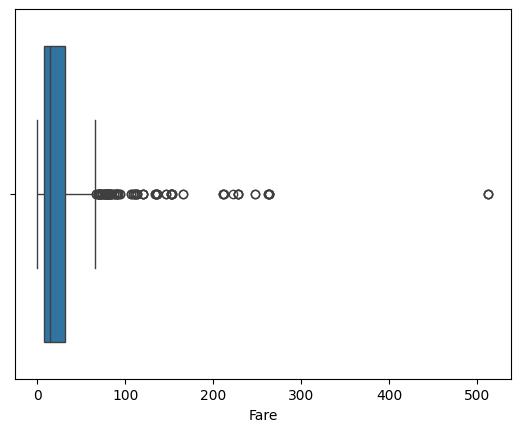

In [25]:
df=data.copy()
sns.boxplot(x=df["Fare"])

<Axes: >

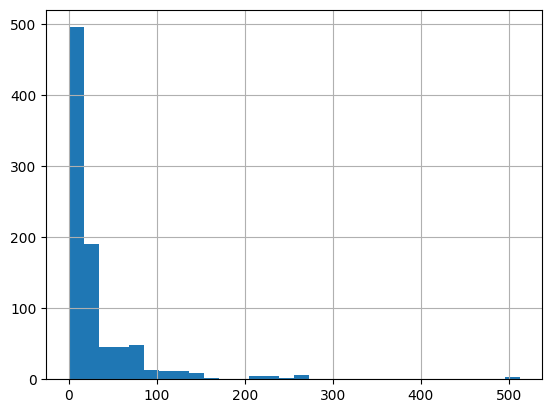

In [26]:
df=data.copy()
df["Fare"].hist(bins=30)

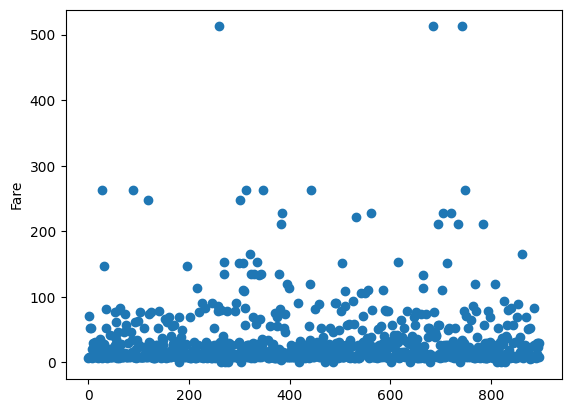

In [27]:
df=data.copy()
plt.scatter(df.index, df["Fare"])
plt.ylabel("Fare")
plt.show()

5.3 Handling Outliers

5.3.1 Cap (Winsorization)

In [28]:
df=data.copy()
upper = Q3 + 1.5*IQR
df["Fare"] = df["Fare"].clip(upper=upper)


5.3.2 Remove outliers

In [29]:
df=data.copy()
df = df[~((df["Fare"] < Q1 - 1.5*IQR) | (df["Fare"] > Q3 + 1.5*IQR))]

| Situation           | Best choice      |
| ------------------- | ---------------- |
| EDA                 | Boxplot + IQR    |
| Skewed numeric data | Log transform    |
| ML (trees)          | Keep outliers    |
| ML (linear models)  | Cap or transform |
| Small dataset       | Avoid dropping   |

* Fare → skewed, keep or log-transform

* Age → check, but rarely extreme

* SibSp, Parch → small integers, no need to remove

> Better Approach for this case is Box_plot + IOR (cliping Outliers)

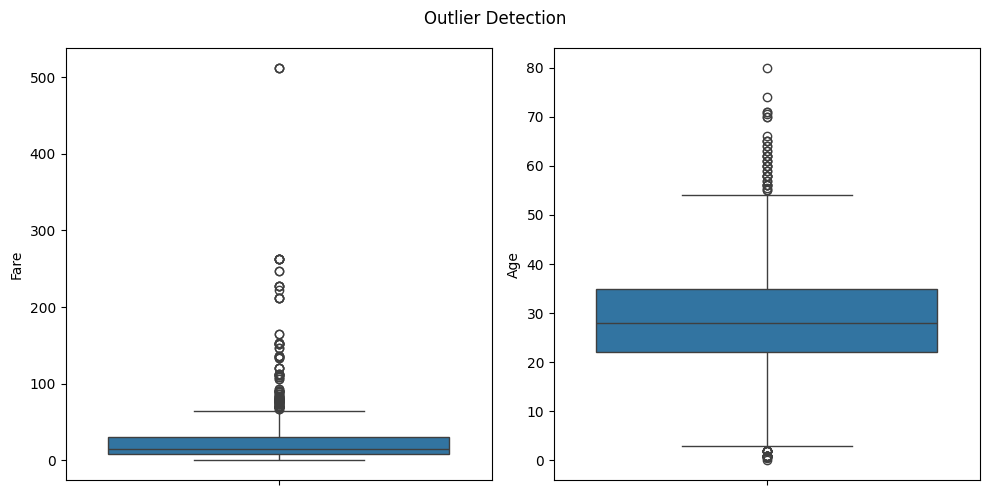

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Fare
sns.boxplot(data['Fare'],
    ax=axes[0]
)

# age
sns.boxplot(data['Age'],
    ax=axes[1]
)

plt.suptitle("Outlier Detection")
plt.tight_layout()
plt.show()


In [31]:
#Fare
Q1 = data["Fare"].quantile(0.25)
Q3 = data["Fare"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
data["Fare"] = data["Fare"].clip(upper=upper)

Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
data["Age"] = data["Age"].clip(upper=upper)
data["Age"] = data["Age"].clip(lower=lower)

## Exploratory Data Analysis 

### Univariate Analysis

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 895
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          892 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     892 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.6+ KB


In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

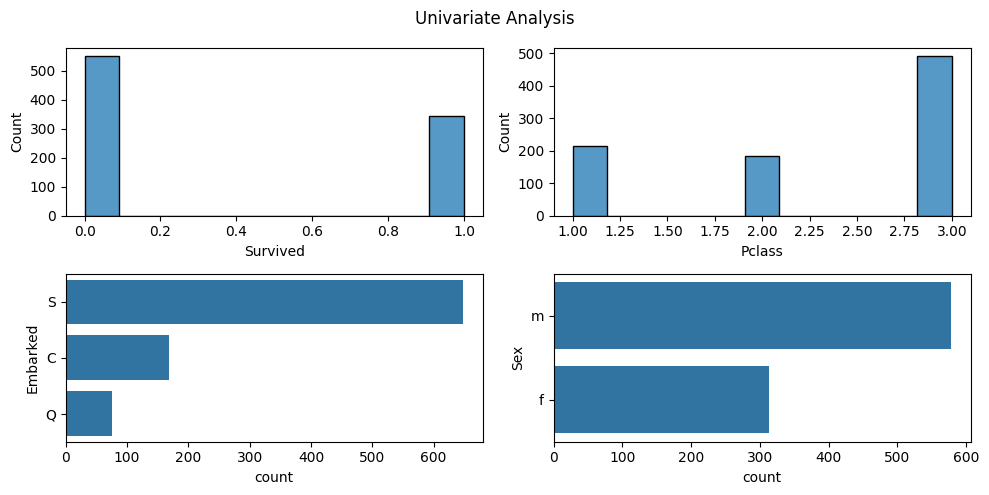

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Survived
sns.histplot(data['Survived'],
    ax=axes[0][0]
)

# Pclass
sns.histplot(data['Pclass'],
    ax=axes[0][1]
)

# Survived
sns.countplot(data['Embarked'],
    ax=axes[1][0]
)

# Pclass
sns.countplot(data['Sex'],
    ax=axes[1][1]
)

plt.suptitle("Univariate Analysis")
plt.tight_layout()
plt.show()

* `Survived` Feature counts `0`-Dead and `1`-Alive , Seems least no. of people survived
* `Embarked` Feature having 3 classes `S, c, Q`, where `S` Class have huge no. of records
* `Sex` Feature Male Passengers travelled in that during the Trip

### Bi-Variate Analysis

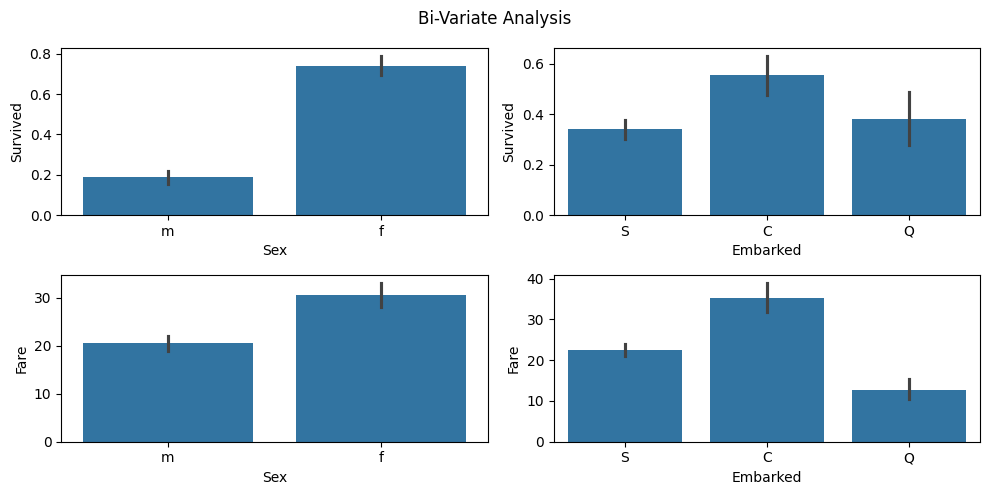

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.barplot(data=data, x='Sex', y='Survived',
            ax=axes[0][0],
            )

sns.barplot(data=data, x='Embarked', y='Survived',
            ax=axes[0][1],
            )

sns.barplot(data=data, x='Sex', y='Fare',
            ax=axes[1][0],
            )
sns.barplot(data=data, x='Embarked', y='Fare',
            ax=axes[1][1]
            )

plt.suptitle("Bi-Variate Analysis")
plt.tight_layout()
plt.show()

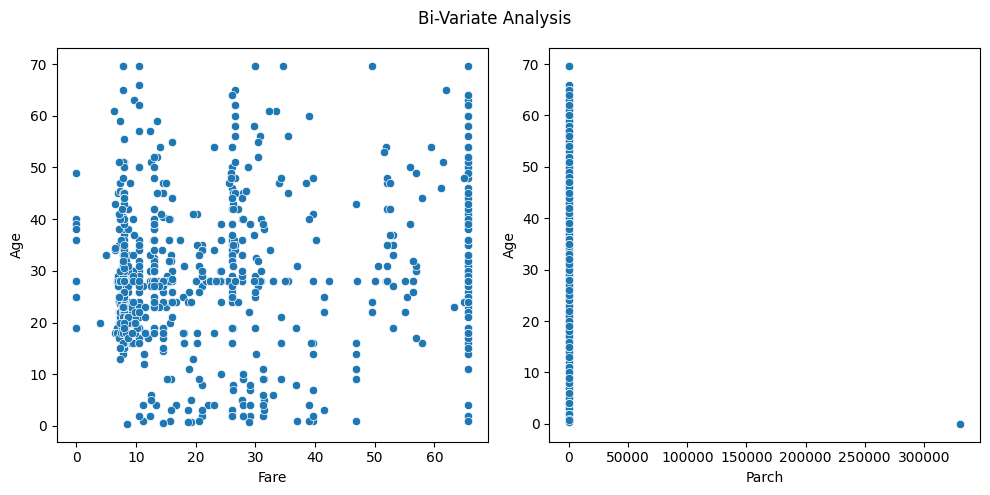

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=data, x='Fare', y='Age',
            ax=axes[0],
            )

sns.scatterplot(data=data, x='Parch', y='Age',
            ax=axes[1],
            )

plt.suptitle("Bi-Variate Analysis")
plt.tight_layout()
plt.show()

### Multi-variate Analysis

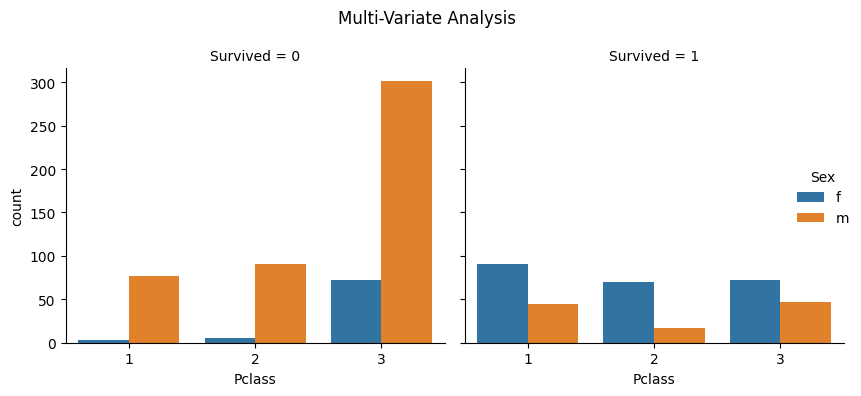

In [38]:
sns.catplot(
    x="Pclass",
    hue="Sex",
    col="Survived",
    data=data,
    kind="count",
    height=4
)
plt.suptitle("Multi-Variate Analysis")
plt.tight_layout()
plt.show()

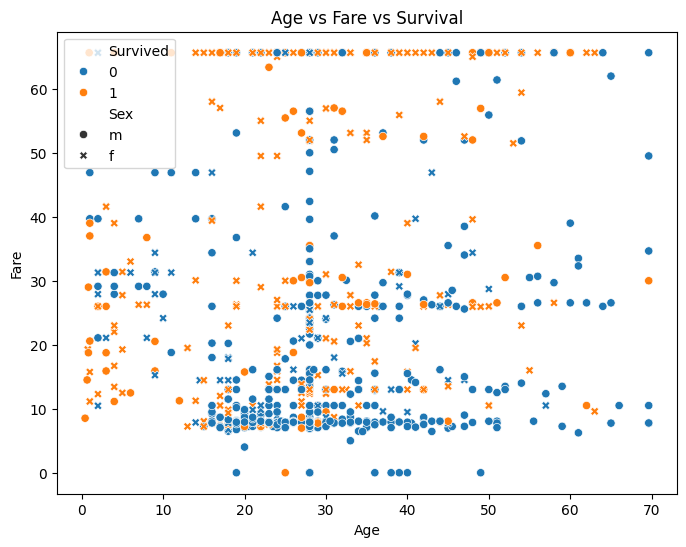

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age",
    y="Fare",
    hue="Survived",
    style="Sex",
    data=data
)
plt.title("Age vs Fare vs Survival")
plt.show()

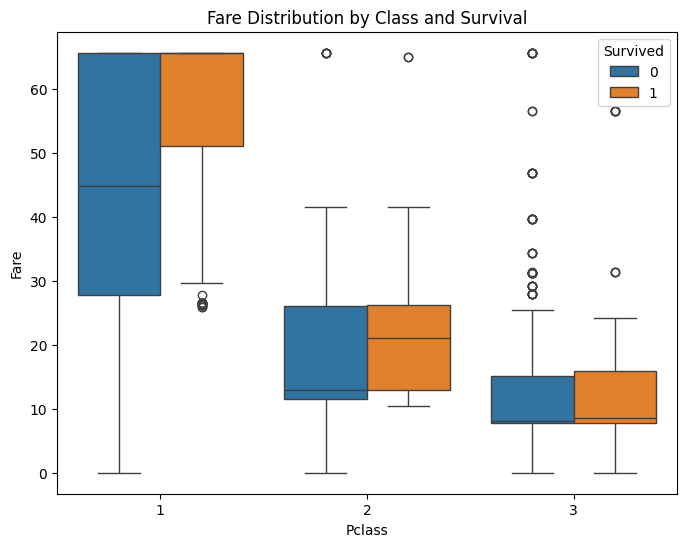

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x="Pclass",
    y="Fare",
    hue="Survived",
    data=data
)
plt.title("Fare Distribution by Class and Survival")
plt.show()


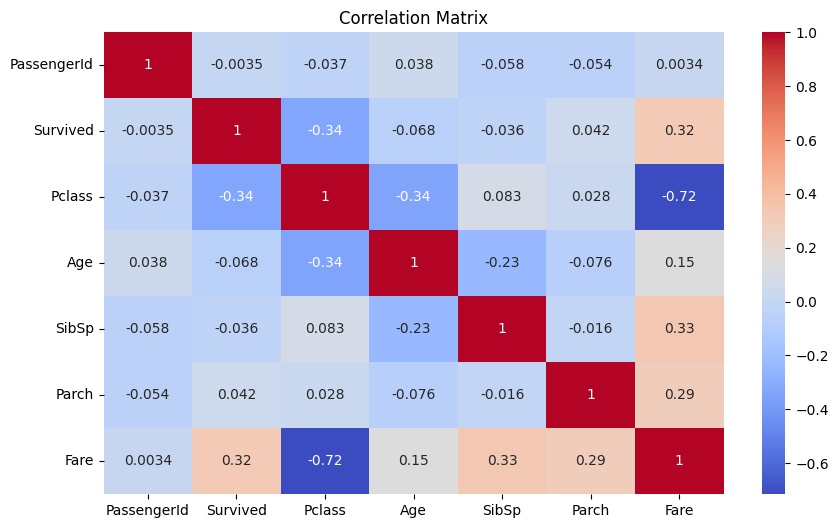

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


In [45]:
data.groupby(["Pclass", "Sex"])["Survived"].mean()

Pclass  Sex
1       f      0.968085
        m      0.368852
2       f      0.921053
        m      0.157407
3       f      0.500000
        m      0.135057
Name: Survived, dtype: float64

## 🔍 EDA Insights (Titanic Dataset)

### 1. **Survival vs Gender and Passenger Class**

* Females had a **much higher survival rate** than males across **all passenger classes**.
* **1st-class females** showed the **highest survival probability**.
* **3rd-class males** had the **lowest survival rate**.
  ➡️ *Gender and class together strongly influence survival.*

---

### 2. **Age, Fare, and Survival Relationship**

* Survivors generally paid **higher fares**, indicating better cabin/class.
* Children (lower age group) showed **higher survival rates**, especially when traveling with family.
* Non-survivors are concentrated in **lower fare and higher age ranges**.
  ➡️ *Age and fare jointly affect survival outcomes.*

---

### 3. **Fare Distribution by Class and Survival**

* 1st-class passengers had significantly **higher fare ranges**.
* Survivors in each class paid **more on average** than non-survivors.
* Fare variability is highest in **1st class**, showing luxury segmentation.
  ➡️ *Economic status is a strong multivariate factor.*

---

### 4. **Family Size (SibSp & Parch) Impact**

* Passengers with **small families (1–3 members)** had better survival chances.
* Solo travelers and very large families showed **lower survival rates**.
  ➡️ *Moderate family size improved survival probability.*

---

### 5. **Embarkation Port, Gender, and Survival**

* Females from **Cherbourg (C)** had the **highest survival rate**.
* Passengers embarking from **Southampton (S)** had the lowest survival overall.
  ➡️ *Location + gender adds another survival pattern.*

---

### 6. **Correlation Analysis**

* **Survival is positively correlated with fare**.
* **Survival is negatively correlated with passenger class number** (higher class = lower number).
* Weak correlation between survival and age, but **strong when combined with gender**.
  ➡️ *Multivariate relationships are stronger than univariate ones.*

---

### 7. **Overall Multivariate Conclusion**

Survival on the Titanic was **not random**.
It was influenced by a **combination of factors**:

* Gender (strongest)
* Passenger class & fare
* Age group
* Embarkation port

➡️ **Women, children, wealthier passengers, and those with small families were prioritized.**

---

# <center> *End of Topic* </center>